# EDA Restaurant Reviews


Using Python 3.13

Using this for an inital look at the data and to test the functions.

In [1]:
from text_data_toolkit import data_cleaning as clean
from text_data_toolkit import data_transformation as transform
from text_data_toolkit import eda
from text_data_toolkit import label_sentiment as lss
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

# Quick example of the data cleaning modules


In [2]:
files = ['../data/Restaurant_Reviews_Test.tsv',
         '../data/Restaurant_Reviews.csv',
         '../data/Restaurant_Reviews2.txt',
         '../data/Restaurant_Reviews.tsv']


dfs = clean.load_text_to_df(files, columns = ["Review", "Like"], line_length = 2)

In [3]:
df_csv = dfs['Restaurant_Reviews']
df_csv.head()

,Review,Like
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [4]:
df_txt = dfs['Restaurant_Reviews2']
df_txt = df_txt.drop(0)
df_txt.head()

,Review,Like
1,Wow... Loved this place.,1
2,Crust is not good.,0
3,Not tasty and the texture was just nasty.,0
4,Stopped by during the late May bank holiday of...,1
5,The selection on the menu was great and so wer...,1


In [5]:
df_tsv = dfs['Restaurant_Reviews_Test']
df = dfs["Restaurant_Reviews"]
df_tsv.head()

,Review,Like
0,Wow... Loved this place.,1.0
1,Crust isn't good .,0.0
2,Wow... Loved this place.,1.0
3,"""",NaN
4,Not tasty and the texture was just nasty.,0.0


In [6]:
# Homogenize the columns in the format first_column
df_tsv = clean.homogenize_columns(df_tsv)

In [7]:
# Remove the Duplicates rows
df_tsv_remove_dup = clean.remove_duplicates_fuzzy(df_tsv, "review", threshold = 90)
df_tsv_remove_dup.head()

,review,like
0,Wow... Loved this place.,1.0
1,Crust isn't good .,0.0
2,"""",NaN
3,Not tasty and the texture was just nasty.,0.0
4,Stopped by during the late May bank holiday of...,1.0


In [8]:
# Normalize the Text (Lowercase & Remove Punctuation, Remove Whitespaces)
df_tsv_norm = clean.normalize_data(df_tsv_remove_dup, "review")
df_tsv_norm.head()

,review,like
0,wow loved this place,1.0
1,crust isn't good,0.0
2,,NaN
3,not tasty and the texture was just nasty,0.0
4,stopped by during the late may bank holiday of...,1.0


In [9]:
# Handle Missing Values
df_tsv_na = clean.handle_missing_values(df_tsv, "review")
df_tsv_na.head()

,review,like
0,wow loved this place,1.0
1,crust isn't good,0.0
2,not tasty and the texture was just nasty,0.0
3,stopped by during the late may bank holiday of...,1.0
4,the selection on the menu was great and so wer...,1.0


In [10]:
# Load the original text dataframe to demonstrate the mass clean
df_test = clean.load_text_to_df(['../data/Restaurant_Reviews_Test.tsv'],
                            columns =["Review", "Like"], line_length = 0)
df_tsv_dirty = df_test['Restaurant_Reviews_Test']
df_tsv_dirty.head()

,Review,Like
0,Wow... Loved this place.,1.0
1,Crust isn't good .,0.0
2,Wow... Loved this place.,1.0
3,"""",NaN
4,Not tasty and the texture was just nasty.,0.0


In [11]:
# Mass Cleaning Function (Remove Duplicates, Normalize, Handle Missing Values)
cleaned_df_tsv = clean.clean_dataframe(df_tsv_dirty, "review")
cleaned_df_tsv.head()

,review,like
0,wow loved this place,1.0
1,crust isn't good,0.0
2,not tasty and the texture was just nasty,0.0
3,stopped by during the late may bank holiday of...,1.0
4,the selection on the menu was great and so wer...,1.0


# Here lies examples of the data transformation modules


In [12]:
# Tokenize Dataframe Example
cleaned_df_tsv_tokenized = transform.tokenize_dataframe(cleaned_df_tsv, "review")
cleaned_df_tsv_tokenized.head()

,review,like,Tokenized Text
0,wow loved this place,1.0,"wow, loved, this, place"
1,crust isn't good,0.0,"crust, isn't, good"
2,not tasty and the texture was just nasty,0.0,"not, tasty, and, the, texture, was, just, nasty"
3,stopped by during the late may bank holiday of...,1.0,"stopped, by, during, the, late, may, bank, hol..."
4,the selection on the menu was great and so wer...,1.0,"the, selection, on, the, menu, was, great, and..."


In [13]:
# Remove Stopwords Example
cleaned_df_tsv = transform.remove_stopwords(cleaned_df_tsv_tokenized, "review", custom_stopword = None, new_column = "Review No Stopwords")

cleaned_df_tsv.head()

,review,like,Tokenized Text,Review No Stopwords
0,wow loved this place,1.0,"wow, loved, this, place",wow loved place
1,crust isn't good,0.0,"crust, isn't, good",crust isn't good
2,not tasty and the texture was just nasty,0.0,"not, tasty, and, the, texture, was, just, nasty",not tasty texture just nasty
3,stopped by during the late may bank holiday of...,1.0,"stopped, by, during, the, late, may, bank, hol...",stopped during late may bank holiday off rick ...
4,the selection on the menu was great and so wer...,1.0,"the, selection, on, the, menu, was, great, and...",selection menu great prices


In [14]:
# Stem Words Example
cleaned_df_tsv["Stemmed"] = cleaned_df_tsv["Review No Stopwords"].apply(transform.basic_stem_words)

cleaned_df_tsv.head()


,review,like,Tokenized Text,Review No Stopwords,Stemmed
0,wow loved this place,1.0,"wow, loved, this, place",wow loved place,wow lov place
1,crust isn't good,0.0,"crust, isn't, good",crust isn't good,crust isn't good
2,not tasty and the texture was just nasty,0.0,"not, tasty, and, the, texture, was, just, nasty",not tasty texture just nasty,not tasty texture just nasty
3,stopped by during the late may bank holiday of...,1.0,"stopped, by, during, the, late, may, bank, hol...",stopped during late may bank holiday off rick ...,stopp during late may bank holiday off rick st...
4,the selection on the menu was great and so wer...,1.0,"the, selection, on, the, menu, was, great, and...",selection menu great prices,selec menu great pric


In [15]:
# Autocorrect Words
cleaned_df_tsv["Autocorrected"] = cleaned_df_tsv["Review No Stopwords"].apply(transform.autocorrect_text)
cleaned_df_tsv["Autocorrected"].head(10)


0                                       wow love place
1                                     crust isn't good
2                         not tasty texture just nasty
3    stop during late may bank holiday off rick ste...
4                              select menu great price
5                          now get angry want damn pho
6                          honeslty didn't taste fresh
7    potato like rubber tell made ahead time kept warm
8                                         ri great too
9                                          great touch
Name: Autocorrected, dtype: object

In [16]:
# Label Data Sentiment Example
cleaned_df_tsv["Sentiment"] = cleaned_df_tsv["Review No Stopwords"].apply(lambda x: lss.label_data_sentiment(x))

cleaned_df_tsv.head()

,review,like,Tokenized Text,Review No Stopwords,Stemmed,Autocorrected,Sentiment
0,wow loved this place,1.0,"wow, loved, this, place",wow loved place,wow lov place,wow love place,Positive
1,crust isn't good,0.0,"crust, isn't, good",crust isn't good,crust isn't good,crust isn't good,Negative
2,not tasty and the texture was just nasty,0.0,"not, tasty, and, the, texture, was, just, nasty",not tasty texture just nasty,not tasty texture just nasty,not tasty texture just nasty,Negative
3,stopped by during the late may bank holiday of...,1.0,"stopped, by, during, the, late, may, bank, hol...",stopped during late may bank holiday off rick ...,stopp during late may bank holiday off rick st...,stop during late may bank holiday off rick ste...,Positive
4,the selection on the menu was great and so wer...,1.0,"the, selection, on, the, menu, was, great, and...",selection menu great prices,selec menu great pric,select menu great price,Positive


# EDA of our Restaurant Review Dataset



Let us first quickly clean the dataset using our toolkit. We will begin by cleaning the data and investigate the sentiment for the reviews of the restaurant.

In [17]:
df.shape

(1000, 2)

In [18]:
# Let us now take a look at our actual dataset
df = clean.clean_dataframe(df, "review")
transform.tokenize_dataframe(df, "review")
df = transform.remove_stopwords(df, "review", new_column = "Cleaned")
df["Cleaned_Sentiment"] = df["Cleaned"].apply(lambda x: lss.label_data_sentiment(x))
df = clean.homogenize_columns(df)


In [19]:
df.head()
print(df.shape)

(995, 5)


The original shape of our dataframe was 1000 by 2. The new shape with additional columns for tokenized, removing stopwords, and sentiment is now 995 by 5. This indicates that 5 reviews or so were similar enough to be removed.

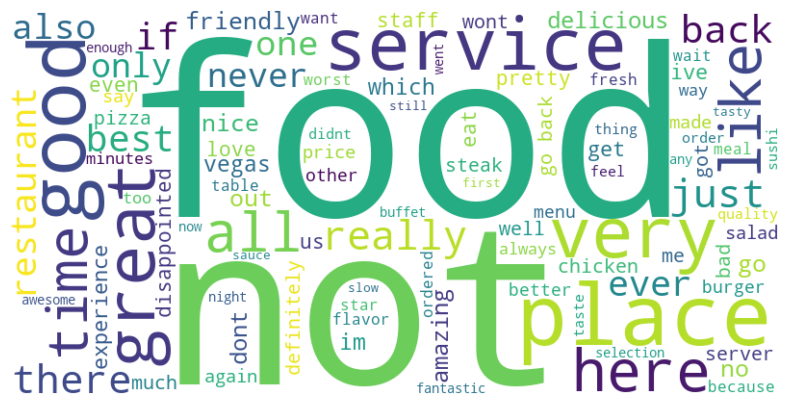

In [20]:
# Generate Wordcloud of our cleaned series
eda.generate_wordcloud(df["cleaned"], custom_stopwords=["will", "some", "came"])

Taking a look at the wordcloud of all our cleaned text data we can see words that we would generally associate with a restaurant. There also appears to be a mixture of positive and negative words regarding the restaurant.

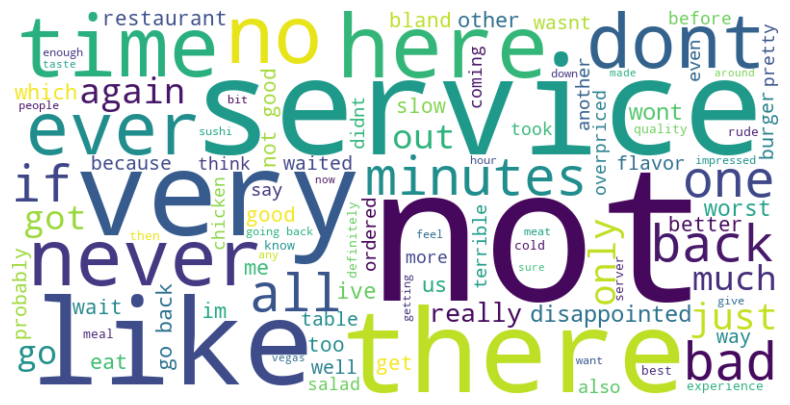

In [21]:
# Generate Wordcloud of our negative sentiment cleaned series
eda.generate_wordcloud(df[df["like"] == 0.0]["cleaned"], custom_stopwords=["will", "some", "came", "food", "place"])

Taking a look at the negative sentiment of our cleaned data we can get an idea of what may be an issue in the restaurant. Words like wait, time, minutes can give us an idea that people getting their food on time is an issue.

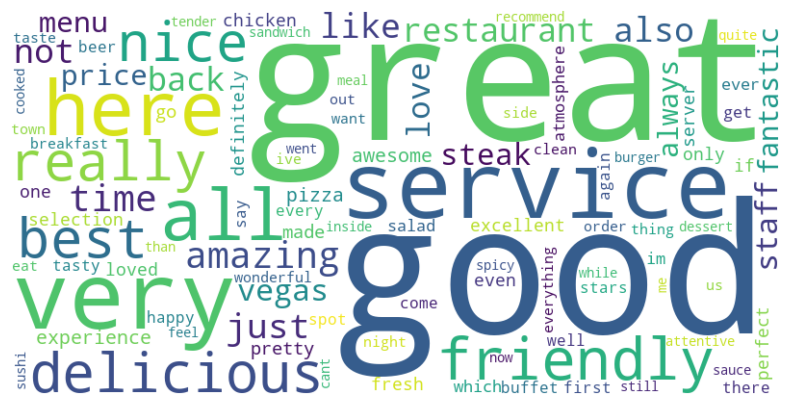

In [22]:
# Generate Wordcloud of our positive sentiment cleaned series
eda.generate_wordcloud(df[df["like"] == 1.0]["cleaned"], custom_stopwords=["will", "some", "came", "food", "place"])

A similar conclusion can be drawn of what the restaurant is doing well. Friendly, service and general positive adjectives can give us a hint that the service and food is good at the restaurant.

In [23]:
# Summary Statistics of our Text Data
eda.text_summary_stats(df, "cleaned")

{'document_stats': {'total_docs': 995, 'empty_docs': 0, 'unique_docs': 992},
 'length_stats': {'min_length': 5,
  'max_length': 120,
  'total_length': 40514,
  'char_count_mean': 40.71758793969849,
  'char_count_median': 36},
 'word_stats': {'avg_words_per_doc': 6.519597989949749,
  'total_words': 6487,
  'unique_words': 2025,
  'avg_word_length': 5.398797595190381},
 'frequent_words': {'not': 114,
  'good': 95,
  'service': 83,
  'very': 75,
  'great': 70,
  'back': 59,
  'here': 56,
  'like': 46,
  'go': 43,
  'all': 43}}

The summary statistics of our text data provides some useful information of our text data. All of the frequent words make sense in the context of a person writing a restaurant review. The sentiment is ambiguous as people could be saying negative or positive descriptors about the service and coming back "here".

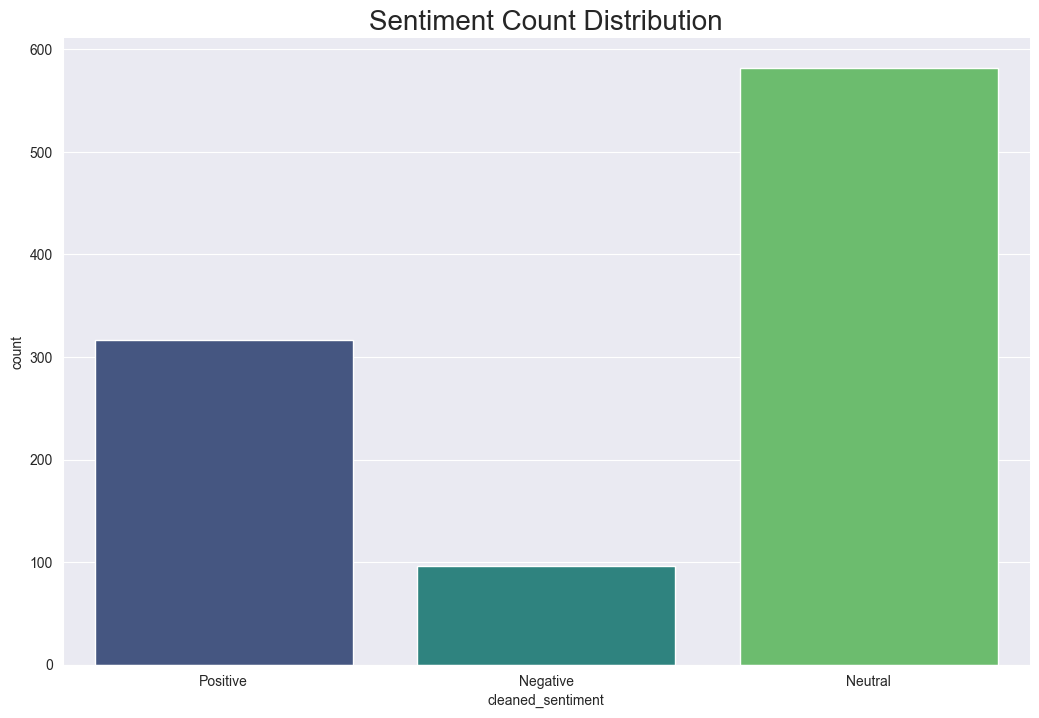

,review,like,tokenized_text,cleaned,cleaned_sentiment
0,wow loved this place,1,"wow, loved, this, place",wow loved place,Positive
1,crust is not good,0,"crust, is, not, good",crust not good,Negative
2,not tasty and the texture was just nasty,0,"not, tasty, and, the, texture, was, just, nasty",not tasty texture just nasty,Negative
3,stopped by during the late may bank holiday of...,1,"stopped, by, during, the, late, may, bank, hol...",stopped during late may bank holiday off rick ...,Positive
4,the selection on the menu was great and so wer...,1,"the, selection, on, the, menu, was, great, and...",selection menu great prices,Positive
...,...,...,...,...,...
990,i think food should have flavor and texture an...,0,"i, think, food, should, have, flavor, and, tex...",think food flavor texture both lacking,Neutral
991,appetite instantly gone,0,"appetite, instantly, gone",appetite instantly gone,Neutral
992,overall i was not impressed and would not go back,0,"overall, i, was, not, impressed, and, would, n...",overall not impressed not go back,Neutral
993,the whole experience was underwhelming and i t...,0,"the, whole, experience, was, underwhelming, an...",whole experience underwhelming think we'll jus...,Neutral


In [24]:
# Sentiment Distribution Graph
eda.plot_sentiment_distribution(df = df, text_column="cleaned")

Now let us take a quick peek at the distribution of our lexicon based sentiment analysis. Our dataset had 995 rows and our sentiment analysis approximately labeled 320 as Positive, 100 as Negative and 580 as Neutral. Luckily, we are working with a already labeled dataset so we can see the accuracy our sentiment analysis.

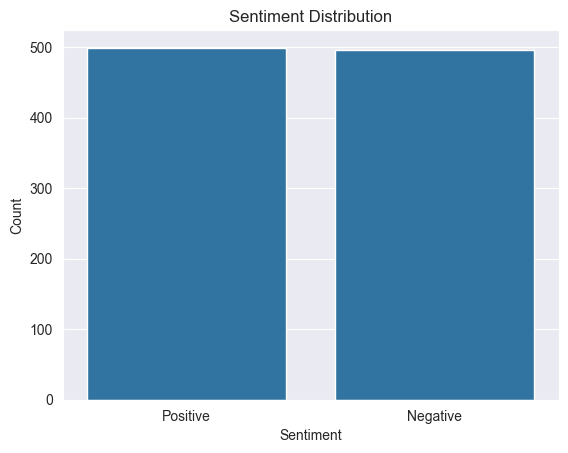

In [25]:
# Actual Sentiment
df["like"] = df["like"].astype(float)
df["like"] = df["like"].map({0.0: "Negative", 1.0: "Positive"})

sns.countplot(data=df, x="like")
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()


Well unfortunately we were quite off. The actual dataset is basically a 50/50 split of positive and negative sentiment. Our sentiment analysis seemed to have mislabeled more than half of the dataset as neutral. This inaccuracy is expected using a lexicon based logic, but let us take a closer look into what went wrong.

In [26]:
different = df[df["like"] != df["cleaned_sentiment"]]
display(different)

,review,like,tokenized_text,cleaned,cleaned_sentiment
6,honeslty it didn't taste that fresh,Negative,"honeslty, it, didn't, taste, that, fresh",honeslty didn't taste fresh,Neutral
7,the potatoes were like rubber and you could te...,Negative,"the, potatoes, were, like, rubber, and, you, c...",potatoes like rubber tell made ahead time kept...,Positive
10,service was very prompt,Positive,"service, was, very, prompt",service very prompt,Neutral
11,would not go back,Negative,"would, not, go, back",not go back,Neutral
12,the cashier had no care what so ever on what i...,Negative,"the, cashier, had, no, care, what, so, ever, o...",cashier no care ever say still ended wayyy ove...,Neutral
...,...,...,...,...,...
990,i think food should have flavor and texture an...,Negative,"i, think, food, should, have, flavor, and, tex...",think food flavor texture both lacking,Neutral
991,appetite instantly gone,Negative,"appetite, instantly, gone",appetite instantly gone,Neutral
992,overall i was not impressed and would not go back,Negative,"overall, i, was, not, impressed, and, would, n...",overall not impressed not go back,Neutral
993,the whole experience was underwhelming and i t...,Negative,"the, whole, experience, was, underwhelming, an...",whole experience underwhelming think we'll jus...,Neutral


Here we can kind of get an idea of what wrong and we can see that our general lexicons are probably also missing a lot of words related to food sentiment. Let us take a closer look of the most used words in the reviews mislabeled "Neutral".

In [27]:
# Top Bi-Grams of Neutral
eda.top_ngrams((df[df["cleaned_sentiment"] == "Neutral"]["cleaned"]), stopwords="food", n=2, top_k=15)

[(('go', 'back'), 15),
 (('here', 'again'), 7),
 (('will', 'never'), 7),
 (('going', 'back'), 7),
 (('back', 'here'), 6),
 (('will', 'not'), 6),
 (('more', 'than'), 5),
 (('dont', 'think'), 5),
 (('5', 'stars'), 5),
 (('anytime', 'soon'), 5),
 (('as', 'well'), 4),
 (('never', 'ever'), 4),
 (('will', 'go'), 4),
 (('very', 'disappointed'), 4),
 (('not', 'impressed'), 4)]

In [28]:
# Top Bi-Grams of Neutral with additional stopwords
eda.top_ngrams((df[df["cleaned_sentiment"] == "Neutral"]["cleaned"]), stopwords={"food", "not", "place", "service", "back", "go"}, n=2, top_k=15)

[(('here', 'again'), 7),
 (('will', 'never'), 7),
 (('more', 'than'), 5),
 (('dont', 'think'), 5),
 (('5', 'stars'), 5),
 (('anytime', 'soon'), 5),
 (('as', 'well'), 4),
 (('never', 'ever'), 4),
 (('very', 'disappointed'), 4),
 (('very', 'friendly'), 4),
 (('zero', 'stars'), 4),
 (('wont', 'going'), 4),
 (('came', 'out'), 4),
 (('eat', 'here'), 4),
 (('every', 'time'), 3)]

In [29]:
# Top Tri-Grams of Neutral
eda.top_ngrams((df[df["cleaned_sentiment"] == "Neutral"]["cleaned"]), stopwords="food", n=3, top_k=15)

[(('will', 'never', 'ever'), 4),
 (('will', 'go', 'back'), 4),
 (('wont', 'going', 'back'), 4),
 (('back', 'here', 'again'), 3),
 (('going', 'back', 'anytime'), 3),
 (('back', 'anytime', 'soon'), 3),
 (('not', 'go', 'back'), 2),
 (('just', 'dont', 'know'), 2),
 (('time', 'im', 'vegas'), 2),
 (('service', 'extremely', 'slow'), 2),
 (('go', 'back', 'service'), 2),
 (('give', 'zero', 'stars'), 2),
 (('going', 'back', 'there'), 2),
 (('will', 'not', 'getting'), 2),
 (('never', 'ever', 'go'), 2)]

Here we can see that a lot of our mislabeled sentiment may be because of reviews discussing whether they would or would not go back to this restaurant. Let us try to improve our lexicon a bit, specifically for restaurant reviews.

In [41]:
df["new_sentiment"] = df["cleaned"].apply(
    lambda x: lss.label_data_sentiment(x,
    custom_positive = {"tasty", "taste", "prompt", "delicious",  "fullfilled", "go", "friendly", "5", "five", "4", "four", "3", "three"},
    custom_negative = {"nasty", "angry", "no", "damn", "rubber", "gross", "never", "disappointed", "2", "two", "1", "one", "0", "zero", "underwhelming"},
    filename = '../data/Restaurant_Lexicon.json'))

different = df[df["like"] != df["new_sentiment"]]
display(different)


,review,like,tokenized_text,cleaned,cleaned_sentiment,new_sentiment,ml_prediction
7,the potatoes were like rubber and you could te...,Negative,"the, potatoes, were, like, rubber, and, you, c...",potatoes like rubber tell made ahead time kept...,Positive,Positive,Negative
13,i tried the cape cod ravoli chicken with cranb...,Positive,"i, tried, the, cape, cod, ravoli, chicken, wit...",tried cape cod ravoli chicken cranberrymmmm,Neutral,Neutral,Positive
14,i was disgusted because i was pretty sure that...,Negative,"i, was, disgusted, because, i, was, pretty, su...",disgusted because pretty sure human hair,Neutral,Neutral,Negative
16,highly recommended,Positive,"highly, recommended",highly recommended,Neutral,Neutral,Positive
17,waitress was a little slow in service,Negative,"waitress, was, a, little, slow, in, service",waitress little slow service,Neutral,Neutral,Negative
...,...,...,...,...,...,...,...
987,a lady at the table next to us found a live gr...,Negative,"a, lady, at, the, table, next, to, us, found, ...",lady table next us found live green caterpilla...,Neutral,Neutral,Negative
990,i think food should have flavor and texture an...,Negative,"i, think, food, should, have, flavor, and, tex...",think food flavor texture both lacking,Neutral,Neutral,Negative
991,appetite instantly gone,Negative,"appetite, instantly, gone",appetite instantly gone,Neutral,Neutral,Negative
993,the whole experience was underwhelming and i t...,Negative,"the, whole, experience, was, underwhelming, an...",whole experience underwhelming think we'll jus...,Neutral,Neutral,Negative


In [31]:
different1 = df[df["like"] != df["cleaned_sentiment"]]
different2 = df[df["like"] != df["new_sentiment"]]
print(len(different1) - len(different2))

118


Not bad, with just a small addition of words we reduced the number of mismatches by approximately 20%. We can take a look at our restaurant lexicon file to see that our default lexicons have been updated with more words associated to a restaurant

# Quick Glimpse into using ML for text data

Our sentiment function allows users to easily input their own lexicons to label text data based on their own sentiment. An actual machine learning model can label text data with general sentiment much more accurately.

Now let us vectorize our text and take a look at the accuracy of a Multinomial Naive Bayes classifier and the accuracy of our lexicon based sentiment approach. We selected Multinomial because it is generally the best choice due to its efficiency and effectiveness. max features in the context of text vectorization represents the number of most frequent words. We will limit our vocabulary to 100. Here X is our matrix of df['cleaned'] and vectorizer is our fitted count vectorizer.

In [32]:
X, vectorizer = transform.vectorize_text(df['cleaned'], method = "count", max_features = 100)
model = MultinomialNB()
model.fit(X, df['like'])
df['ml_prediction'] = model.predict(X)

print("ML Accuracy:", accuracy_score(df['like'], df['ml_prediction']))
print("Lexicon Accuracy:", accuracy_score(df['like'], df['new_sentiment']))


ML Accuracy: 0.749748743718593
Lexicon Accuracy: 0.49246231155778897


Well we can see an actual ML model is much more accurate than our simple lexicons, but let us see if we can improve the model with our sentiment function. Since, we are using a small max_features (100) there may be a chance. Now let us split our data into roughly 70% training, 15% validation, and 15% testing sets.

In [33]:
df_train, df_val, df_test = transform.split_data(df, target_column = "like", train_size = 0.7, test_size = 0.15, random_state = 42)

print("Train Samples:",len(df_train), ", Validation Samples:",len(df_val),", Testing Samples:", len(df_test))

Train Samples: 695 , Validation Samples: 150 , Testing Samples: 150


Perfect. The data is split roughly 70, 15, 15 and now we can fit the vectorizer on our training set. Using bag of words (BOW) an NLP technique that represents text by counting frequency, we can transform our validation and testing sets into the same vector.

In [34]:
X_train_bow, vectorizer = transform.vectorize_text(
    df_train["cleaned"],
    method="count",
    max_features=100)

X_val_bow = vectorizer.transform(df_val["cleaned"])
X_test_bow = vectorizer.transform(df_test["cleaned"])

Now let us use our sentiment function to count the number of positive words, negative words, and sentiment score for our three sets.

In [35]:
df_train[['pos_count', 'neg_count', 'sentiment_score']] = df_train['cleaned'].apply(
    lambda x: pd.Series(lss.sentiment_features(
        x, filename='../data/Restaurant_Lexicon.json')))

df_val[['pos_count', 'neg_count', 'sentiment_score']] = df_val['cleaned'].apply(
    lambda x: pd.Series(lss.sentiment_features(
        x, filename='../data/Restaurant_Lexicon.json')))

df_test[['pos_count', 'neg_count', 'sentiment_score']] = df_test['cleaned'].apply(
    lambda x: pd.Series(lss.sentiment_features(
        x, filename='../data/Restaurant_Lexicon.json')))


We are using a multinomial model which does not accept negative values, so we will shift our scores to be non-negative.

In [36]:
min_score = min(df_train['sentiment_score'].min(),
                df_val['sentiment_score'].min(),
                df_test['sentiment_score'].min())

if min_score < 0:
    df_train['sentiment_score'] += abs(min_score)
    df_val['sentiment_score'] += abs(min_score)
    df_test['sentiment_score'] += abs(min_score)

Now we will convert our training, validation, and testing matrices to a numpy array. Then, we can create numpy arrays for the positive count, negative count, and sentiment score of our three sets and combine them with our BOW. The format would look something like [BOW, pos_count, neg_count, sentiment_score]
The target arrays of all three sets are defined from the "like" column of our dataframes.

In [37]:
X_train_bow = X_train_bow.toarray()
X_val_bow   = X_val_bow.toarray()
X_test_bow  = X_test_bow.toarray()

X_train_lex = df_train[["pos_count", "neg_count", "sentiment_score"]].values
X_val_lex   = df_val[["pos_count", "neg_count", "sentiment_score"]].values
X_test_lex  = df_test[["pos_count", "neg_count", "sentiment_score"]].values

X_train_combined = np.hstack((X_train_bow, X_train_lex))
X_val_combined   = np.hstack((X_val_bow,   X_val_lex))
X_test_combined  = np.hstack((X_test_bow,  X_test_lex))

y_train = df_train["like"]
y_val   = df_val["like"]
y_test  = df_test["like"]

Now we will again use a Naive Bayes Multinomial to train a model with our lexicon features.

In [38]:
model = MultinomialNB()
model.fit(X_train_combined, y_train)

y_val_pred = model.predict(X_val_combined)
val_accuracy = accuracy_score(y_val, y_val_pred)
print("Validation Accuracy (with Lexicon):", val_accuracy)

y_test_pred = model.predict(X_test_combined)
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Test Accuracy (with Lexicon):", test_accuracy)

Validation Accuracy (with Lexicon): 0.7866666666666666
Test Accuracy (with Lexicon): 0.7466666666666667


Based on our low max features of 100, we can see the accuracy of our model with the lexicon only slightly differed from our original mode. We can set up a quick loop to see how the accuracy of our model changes with max features and set up a line plot to display our results.

In [39]:
results = []
for i in range(50, 1000, 50):

    X, vectorizer = transform.vectorize_text(df['cleaned'], method = "count", max_features = i)
    model = MultinomialNB()
    model.fit(X, df['like'])
    df['ml_prediction'] = model.predict(X)
    ml_accuracy = accuracy_score(df['like'], df['ml_prediction'])
    lex_accuracy = accuracy_score(df['like'], df['new_sentiment'])

    df_train, df_val, df_test = transform.split_data(df, target_column = "like", train_size = 0.7, test_size = 0.15, random_state = 42)

    X_train_bow, vectorizer = transform.vectorize_text(
        df_train["cleaned"],
        method="count",
        max_features=i)

    X_val_bow = vectorizer.transform(df_val["cleaned"])
    X_test_bow = vectorizer.transform(df_test["cleaned"])

    df_train[['pos_count', 'neg_count', 'sentiment_score']] = df_train['cleaned'].apply(
        lambda x: pd.Series(lss.sentiment_features(
            x, filename='../data/Restaurant_Lexicon.json')))

    df_val[['pos_count', 'neg_count', 'sentiment_score']] = df_val['cleaned'].apply(
        lambda x: pd.Series(lss.sentiment_features(
            x, filename='../data/Restaurant_Lexicon.json')))

    df_test[['pos_count', 'neg_count', 'sentiment_score']] = df_test['cleaned'].apply(
        lambda x: pd.Series(lss.sentiment_features(
            x, filename='../data/Restaurant_Lexicon.json')))

    min_score = min(df_train['sentiment_score'].min(),
                    df_val['sentiment_score'].min(),
                    df_test['sentiment_score'].min())

    if min_score < 0:
        df_train['sentiment_score'] += abs(min_score)
        df_val['sentiment_score'] += abs(min_score)
        df_test['sentiment_score'] += abs(min_score)

    X_train_bow = X_train_bow.toarray()
    X_val_bow   = X_val_bow.toarray()
    X_test_bow  = X_test_bow.toarray()

    X_train_lex = df_train[["pos_count", "neg_count", "sentiment_score"]].values
    X_val_lex   = df_val[["pos_count", "neg_count", "sentiment_score"]].values
    X_test_lex  = df_test[["pos_count", "neg_count", "sentiment_score"]].values

    X_train_combined = np.hstack((X_train_bow, X_train_lex))
    X_val_combined   = np.hstack((X_val_bow,   X_val_lex))
    X_test_combined  = np.hstack((X_test_bow,  X_test_lex))

    y_train = df_train["like"]
    y_val   = df_val["like"]
    y_test  = df_test["like"]

    model = MultinomialNB()
    model.fit(X_train_combined, y_train)

    y_val_pred = model.predict(X_val_combined)
    val_accuracy = accuracy_score(y_val, y_val_pred)
    y_test_pred = model.predict(X_test_combined)
    test_accuracy = accuracy_score(y_test, y_test_pred)

    results.append({
        "Max Features": i,
        "Original Accuracy": ml_accuracy,
        "Validation Accuracy": val_accuracy,
        "Test Accuracy": test_accuracy
    })
results_df = pd.DataFrame(results)

Text(0.5, 1.0, 'Accuracy (with Lexicon) vs. Max Features')

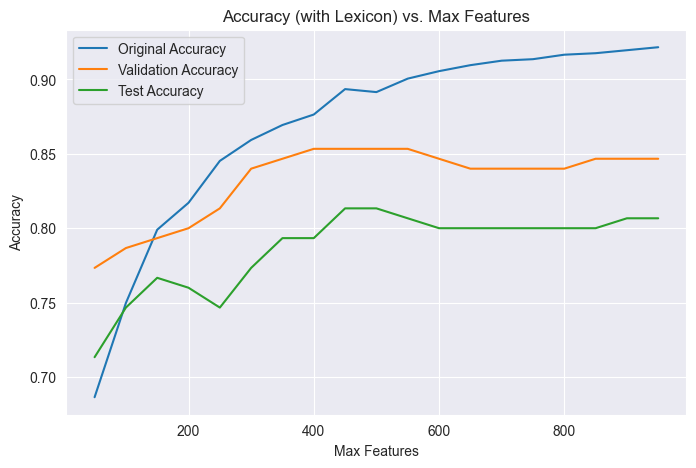

In [40]:
# Graph of our Max Features
import seaborn as sns
plt.figure(figsize=(8, 5))
sns.lineplot(data=results_df, x="Max Features", y="Original Accuracy", label = "Original Accuracy")
sns.lineplot(data=results_df, x="Max Features", y="Validation Accuracy", label = "Validation Accuracy")
sns.lineplot(data=results_df, x="Max Features", y="Test Accuracy", label = "Test Accuracy")
plt.xlabel("Max Features")
plt.ylabel("Accuracy")
plt.title("Accuracy (with Lexicon) vs. Max Features")


We can see that at extremely low max features our accuracy does improve with the incorporation of our lexicon. However, as the number of max features increase the original model significantly outperforms our lexicon based approach. Standard max features would begin at around 200-500 for small text datasets. A small number can be beneficial to reduce noise and allow the model to only focus on important terms. Our lexicon only consists of around 50 words itself, so the drop in validation and test accuracy is expected. A better sentiment dictionary with better words should result in higher accuracy. Perhaps even fine-tuning the original logic or using a different model could help improve our accuracy. Our lexicon words also appear in BOW and simply add redundancy and confusion. In the future, I would like to improve our lexicon by using an ML model.